# Predictive Model Predicting Zomato Restaurant Ratings

BUILD MODEL:

IMPORT DEPENDENCIES:

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
import re # (use regular expression to split words)

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')

# ALGORITHMS TO USE:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

#EXTRA TOOLS:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# DATA SPLITTER FOR TRAINING AND TESTING:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

LOAD DATA:

In [195]:
data = pd.read_csv('zomato_cleaned1.csv')

In [196]:
data.head()

,Unnamed: 0,name,address,rate,votes,cost,online_order,book_table,dish_liked,cuisines,location,rest_type,reviews_list,menu_item,type,city
0,0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",4.1,775,800.0,Yes,Yes,Pasta,North Indian,Banashankari,Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",4.1,775,800.0,Yes,Yes,Pasta,Mughlai,Banashankari,Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
2,0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",4.1,775,800.0,Yes,Yes,Pasta,Chinese,Banashankari,Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
3,0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",4.1,775,800.0,Yes,Yes,Lunch Buffet,North Indian,Banashankari,Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
4,0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",4.1,775,800.0,Yes,Yes,Lunch Buffet,Mughlai,Banashankari,Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [197]:
df = data.drop(['Unnamed: 0'], axis=1)

In [198]:
df.head(2)

,name,address,rate,votes,cost,online_order,book_table,dish_liked,cuisines,location,rest_type,reviews_list,menu_item,type,city
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",4.1,775,800.0,Yes,Yes,Pasta,North Indian,Banashankari,Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",4.1,775,800.0,Yes,Yes,Pasta,Mughlai,Banashankari,Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [199]:
df.columns

Index(['name', 'address', 'rate', 'votes', 'cost', 'online_order',
       'book_table', 'dish_liked', 'cuisines', 'location', 'rest_type',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [200]:
df.shape

(465460, 15)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465460 entries, 0 to 465459
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          465460 non-null  object 
 1   address       465460 non-null  object 
 2   rate          465460 non-null  float64
 3   votes         465460 non-null  int64  
 4   cost          465460 non-null  float64
 5   online_order  465460 non-null  object 
 6   book_table    465460 non-null  object 
 7   dish_liked    465460 non-null  object 
 8   cuisines      465460 non-null  object 
 9   location      465460 non-null  object 
 10  rest_type     465460 non-null  object 
 11  reviews_list  465460 non-null  object 
 12  menu_item     465460 non-null  object 
 13  type          465460 non-null  object 
 14  city          465460 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 53.3+ MB


INSPECT CATEGORICAL VARIABLES:

In [202]:
# Check which columns in dataframe are categorical variables:
cols = df.columns
num_cols = df._get_numeric_data().columns
print('Columns with numerical values →', num_cols)
print('----'*20)
print('Columns in dataframe are categorical variables:')
np.array(list(set(cols) - set(num_cols)))

Columns with numerical values → Index(['rate', 'votes', 'cost'], dtype='object')
--------------------------------------------------------------------------------
Columns in dataframe are categorical variables:


array(['location', 'dish_liked', 'address', 'rest_type', 'type',
       'reviews_list', 'city', 'online_order', 'book_table', 'cuisines',
       'name', 'menu_item'], dtype='<U12')

In [203]:
# Observe the 'book_table' column values:
df['book_table'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: book_table, dtype: object

In [204]:
# Convert 'online_order' column data type to numerical: (coding this section the longer way)
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

# Check data type:
df['book_table'].dtype

# Observation: Data type of 'online_order' is 'object'.

dtype('O')

In [205]:
# Convert 'book_table' column data type to 'numerical'.
df.book_table = pd.to_numeric(df.book_table)
df['book_table'].dtype

dtype('int64')

In [206]:
df['book_table'].head()

0    1
1    1
2    1
3    1
4    1
Name: book_table, dtype: int64

In [207]:
# Check value counts of 'book_table' column:
print('Yes = 1','|', 'No = 0')
df.book_table.value_counts()

Yes = 1 | No = 0


0    277679
1    187781
Name: book_table, dtype: int64

In [208]:
# Observe the 'online_order' column values:
df['online_order'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: online_order, dtype: object

In [209]:
# Convert 'online_order' column data type to numerical: (coding this section the longer way)
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

# Check data type:
df['online_order'].dtype

# Observation: Data type of 'online_order' is 'object'.

dtype('O')

In [210]:
# Convert 'online_order' column data type to 'numerical'.
df.online_order = pd.to_numeric(df.online_order)
df['online_order'].dtype

dtype('int64')

In [211]:
# Check value counts of 'online_order' column:
print('Yes = 1','|', 'No = 0')
df.online_order.value_counts()

Yes = 1 | No = 0


1    319781
0    145679
Name: online_order, dtype: int64

In [212]:
# Observe 'location' column: Inspect the different kinds of values in the column:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [213]:
# Observe value counts of columns: 'location,'rest_type','cuisines','menu_item'

In [214]:
df.location.value_counts().sum()

465460

In [215]:
df.rest_type.value_counts().sum()

465460

In [219]:
df.cuisines.value_counts().sum()

465460

In [220]:
df.menu_item.value_counts().sum()

465460

In [221]:
# Classify different categorical values by Label, columns: 'location','rest_type','cuisines','menu_item'.
# Create Label Encoder tool:
label_enc = LabelEncoder()

In [222]:
# Fit Label Encoder the columns: 'location','rest_type','cuisines','menu_item'.
df.location = label_enc.fit_transform(df.location)
df.rest_type = label_enc.fit_transform(df.rest_type)
df.cuisines = label_enc.fit_transform(df.cuisines)
df.menu_item = label_enc.fit_transform(df.menu_item)

In [223]:
# Observe the columns with labeled values:
df[['location','rest_type','cuisines','menu_item']]

,location,rest_type,cuisines,menu_item
0,1,19,150,5047
1,1,19,63,5047
2,1,19,25,5047
3,1,19,150,5047
4,1,19,63,5047
...,...,...,...,...
465455,84,19,67,5047
465456,84,1,67,5047
465457,25,16,119,5047
465458,25,16,119,5047


SELECT FEATURES TO USE AND FINALIZE DATASET FOR MODEL BUILDING:

In [224]:
# Feature selection: select features to use for the model:
# Create new dataset with selected features, to use for the model.
df_final = df.iloc[:,[2,3,4,5,6,8,9,10,12]]

# Observe the final dataset:
df_final
# Observation: It seems that the number of entries in the dataset has increased too much.
# 465460 rows × 9 columns
# Look for duplicated and NAN values:

,rate,votes,cost,online_order,book_table,cuisines,location,rest_type,menu_item
0,4.1,775,800.0,1,1,150,1,19,5047
1,4.1,775,800.0,1,1,63,1,19,5047
2,4.1,775,800.0,1,1,25,1,19,5047
3,4.1,775,800.0,1,1,150,1,19,5047
4,4.1,775,800.0,1,1,63,1,19,5047
...,...,...,...,...,...,...,...,...,...
465455,2.5,81,800.0,0,0,67,84,19,5047
465456,2.5,81,800.0,0,0,67,84,1,5047
465457,4.3,236,2500.0,0,1,119,25,16,5047
465458,4.3,236,2500.0,0,1,119,25,16,5047


In [225]:
df_final.duplicated().sum()
df_final.drop_duplicates(inplace=True)

In [226]:
df_final.shape
# Observation:
# Dataset shape from: 465460 rows × 9 columns, the real number shape of dataest now is: 47462, 10

(47462, 9)

In [227]:
#Remove the NaN values from the dataset
df_final.isnull().sum()
df_final.dropna(how='any',inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47462 entries, 0 to 464764
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rate          47462 non-null  float64
 1   votes         47462 non-null  int64  
 2   cost          47462 non-null  float64
 3   online_order  47462 non-null  int64  
 4   book_table    47462 non-null  int64  
 5   cuisines      47462 non-null  int32  
 6   location      47462 non-null  int32  
 7   rest_type     47462 non-null  int32  
 8   menu_item     47462 non-null  int32  
dtypes: float64(2), int32(4), int64(3)
memory usage: 2.9 MB


***
<b>Convert final dataset to csv file: (This has already been done.)</b><br>
<b>Code to do it →</b> df_final.to_csv('Zomato_finalclean.csv')
***

In [229]:
#df_final.to_csv('Zomato_finalclean.csv')

BUILD MODEL:

In [230]:
# Upload final dataset to use for the model:
data_final = pd.read_csv('Zomato_finalclean.csv')
data_final

,Unnamed: 0,rate,votes,cost,online_order,book_table,cuisines,location,rest_type,menu_item
0,0,4.1,775,800.0,1,1,150,1,19,5047
1,1,4.1,775,800.0,1,1,63,1,19,5047
2,2,4.1,775,800.0,1,1,25,1,19,5047
3,21,4.1,787,800.0,1,0,113,1,19,5047
4,22,4.1,787,800.0,1,0,67,1,19,5047
...,...,...,...,...,...,...,...,...,...,...
47457,464760,4.0,2856,1100.0,1,1,67,84,1,1908
47458,464761,4.0,2856,1100.0,1,1,16,84,19,1908
47459,464762,4.0,2856,1100.0,1,1,16,84,1,1908
47460,464763,4.0,2856,1100.0,1,1,0,84,19,1908


In [231]:
# Drop 'Unnamed: 0'
df_final = data_final.drop(['Unnamed: 0'], axis=1)

# Observe final dataset.
df_final

,rate,votes,cost,online_order,book_table,cuisines,location,rest_type,menu_item
0,4.1,775,800.0,1,1,150,1,19,5047
1,4.1,775,800.0,1,1,63,1,19,5047
2,4.1,775,800.0,1,1,25,1,19,5047
3,4.1,787,800.0,1,0,113,1,19,5047
4,4.1,787,800.0,1,0,67,1,19,5047
...,...,...,...,...,...,...,...,...,...
47457,4.0,2856,1100.0,1,1,67,84,1,1908
47458,4.0,2856,1100.0,1,1,16,84,19,1908
47459,4.0,2856,1100.0,1,1,16,84,1,1908
47460,4.0,2856,1100.0,1,1,0,84,19,1908


In [232]:
# Create labels to classify ratings as bad(0) good(1): To use for Logistic Regression model:

# Make empty list to fill in.
labels = []

# Make loop
# Loops through each value in rate column.
for i in df_final['rate']:
    # Condition for positive review from 3.5 and above.
    if i >= 3.5:
        labels.append(1)
    # Condition if below 3.5, then equal to negative review(0).
    else:
        labels.append(0)

# Append new column to master dataframe 'df_final'.
# (I will be using this column as my target variable for my Logistic Regression model.)
df_final['rate_label'] = labels

In [233]:
# THIS IS JUST ANOTHER CODE THAT I TRIED AND SAVED. PLEASE IGNORE, THANKS:
# Check correlations: Checking which two variables move in coordination with one another.
#plt.figure(figsize = (15,8))
#sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [234]:
# Observ final dataset:
df_final

,rate,votes,cost,online_order,book_table,cuisines,location,rest_type,menu_item,rate_label
0,4.1,775,800.0,1,1,150,1,19,5047,1
1,4.1,775,800.0,1,1,63,1,19,5047,1
2,4.1,775,800.0,1,1,25,1,19,5047,1
3,4.1,787,800.0,1,0,113,1,19,5047,1
4,4.1,787,800.0,1,0,67,1,19,5047,1
...,...,...,...,...,...,...,...,...,...,...
47457,4.0,2856,1100.0,1,1,67,84,1,1908,1
47458,4.0,2856,1100.0,1,1,16,84,19,1908,1
47459,4.0,2856,1100.0,1,1,16,84,1,1908,1
47460,4.0,2856,1100.0,1,1,0,84,19,1908,1


In [235]:
# Encode the columns containing string types into some sort of code:
def Encode(df_final):
    for column in df_final.columns[~df_final.columns.isin(['rating', 'cost', 'votes'])]:
        df_final[column] = df_final[column].factorize()[0]
    return df_final

df_finalEncode = Encode(df_final.copy())

<AxesSubplot:>

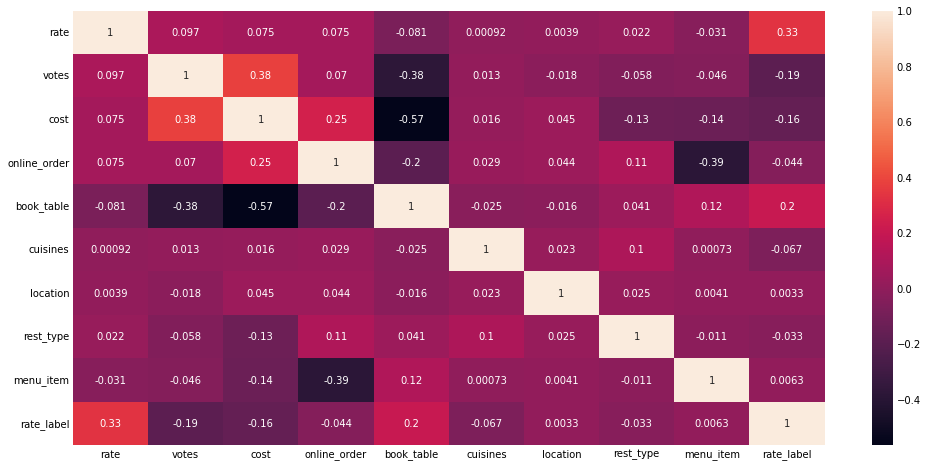

In [236]:
#Get Correlation between different variables
corr = df_finalEncode.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [237]:
# List Highest Correlation Pairs from a Dataset:
print("Correlation Matrix")
print(df_finalEncode.corr())
print()

def get_redundant_pairs(df_finalEncode):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df_finalEncode.columns
    for i in range(0, df_finalEncode.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df_finalEncode.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_finalEncode)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_finalEncode, 10))

Correlation Matrix
                  rate     votes      cost  online_order  book_table  \
rate          1.000000  0.276095  0.141871      0.104398   -0.112861   
votes         0.276095  1.000000  0.344842      0.134162   -0.315686   
cost          0.141871  0.344842  1.000000      0.356637   -0.634673   
online_order  0.104398  0.134162  0.356637      1.000000   -0.198458   
book_table   -0.112861 -0.315686 -0.634673     -0.198458    1.000000   
cuisines      0.009935  0.036604  0.112063      0.052808   -0.058365   
location     -0.008737 -0.041080  0.021025      0.027554    0.007099   
rest_type     0.045354  0.086111  0.276070      0.195105   -0.102142   
menu_item    -0.044699 -0.058872 -0.163300     -0.358613    0.108683   
rate_label    0.438266 -0.141365 -0.177092     -0.044041    0.199104   

              cuisines  location  rest_type  menu_item  rate_label  
rate          0.009935 -0.008737   0.045354  -0.044699    0.438266  
votes         0.036604 -0.041080   0.086111  -0.05

In [239]:
# Observe and check the correlation between features and target variable('rate'):
ratecorr = df_finalEncode.drop(columns=['rate']).corrwith(df['rate'])
print('corrwith result:')
print(ratecorr)
print('-----' * 5)
print('corr result:')
df_finalEncode.corr().rate
# This has two different results. As advised, use result from function df.corr().

corrwith result:
votes          -0.040385
cost            0.005791
online_order    0.010217
book_table      0.009263
cuisines       -0.002717
location        0.120070
rest_type       0.006614
menu_item       0.069411
rate_label      0.009100
dtype: float64
-------------------------
corr result:


rate            1.000000
votes           0.276095
cost            0.141871
online_order    0.104398
book_table     -0.112861
cuisines        0.009935
location       -0.008737
rest_type       0.045354
menu_item      -0.044699
rate_label      0.438266
Name: rate, dtype: float64

## SPLIT DATASET:

In [240]:
# Check columns 'df_final' dataset:
df_finalEncode.columns

Index(['rate', 'votes', 'cost', 'online_order', 'book_table', 'cuisines',
       'location', 'rest_type', 'menu_item', 'rate_label'],
      dtype='object')

In [260]:
# Set up indpedendent(predictors) variables and target variable:
# Set up X and y variable:

# Indepedendent(predictors) variables.
# X = df_finalEncode[['online_order','book_table','votes','location','rest_type','cuisines','cost','menu_item']] # long code.
# X = df_finalEncode.loc[:, df_finalEncode.columns != 'rate']
X = df_finalEncode[df_finalEncode.columns[~df_finalEncode.columns.isin(['rate','rate_label'])]]

# Target variable: 
y = df_finalEncode['rate']

In [262]:
X.head()

,votes,cost,online_order,book_table,cuisines,location,rest_type,menu_item
0,775,800.0,0,0,0,0,0,0
1,775,800.0,0,0,1,0,0,0
2,775,800.0,0,0,2,0,0,0
3,787,800.0,0,1,3,0,0,0
4,787,800.0,0,1,4,0,0,0


SPLIT THE DATA INTO TRAINING SET AND TEST SET:

In [263]:
# Split data into 80 / 20 train and test sets with random state of 353:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=353)
X_train.shape, y_train.shape

((37969, 8), (37969,))

***

# CREATE MODELS: RANDOM FOREST, LINEAR REGRESSION, EXTRA TREE REGRESSION, DECISION TREE:

APPLY RANDOM FOREST ALGORITHM:

In [281]:
# Create model: Random Forest
RandomF_model=RandomForestRegressor(n_estimators=200,random_state=50,min_samples_leaf=.00001)

# Fit model:
RandomF_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=1e-05, n_estimators=200, random_state=50)

In [282]:
# Predict target using X-test:
y_predictRF=RandomF_model.predict(X_test)

# Calculate r2 score:
# code: r2_score(y_test,y_predictRF)
print('Random Forest model R-Square Score: ',(r2_score(y_test,y_predictRF))*100)
r2_score(y_test,y_predictRF)

Random Forest model R-Square Score:  91.9835759054004


0.9198357590540039

In [288]:
# Calculate other metrics:
# Calculate the absolute errors
rf_errors = abs(y_predictRF - y_test)

# Print out the mean absolute error (MAE)
print('Mean Absolute Error Random Forest model:', round(np.mean(y_predictRF), 2))

print('-----' * 20)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (rf_errors / y_test)
print('Mean absolute percentage error (MAPE):',mape)

Mean Absolute Error Random Forest model: 6.95
----------------------------------------------------------------------------------------------------
Mean absolute percentage error (MAPE): 6441       1.70
43753      0.00
2539     135.05
38352      2.00
39103      0.00
          ...  
8401       5.20
12494      0.00
30795       NaN
3417      14.90
35282      0.50
Name: rate, Length: 9493, dtype: float64


***

APPLY LINEAR REGRESSION ALGORITHM:

In [270]:
# Create model: Linear Regression
linreg_model=LinearRegression()

#Fit model:
linreg_model.fit(X_train,y_train)

LinearRegression()

In [337]:
# Predict target using X-test:
y_pred=linreg_model.predict(X_test)

# Calculate r2 score:
# code: r2_score(y_test,y_pred)
print('Linear Regression model R-Square Score: ',(r2_score(y_test,y_pred))*100)
r2_score(y_test,y_pred)

Linear Regression model R-Square Score:  9.530213696891431


0.09530213696891432

In [292]:
# Calculate other metrics:
# Calculate absolute error:
linreg_errors = abs(y_pred - y_test)

# Print out the mean absolute error (MAE)
print('Mean Absolute Error for Linear Regression:', round(np.mean(y_pred), 2))

print('-----' * 20)

# Calculate calculate Mean Squared Error (MSE):
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) for Linear Regression :', mse)

Mean Absolute Error for Linear Regression: 6.92
----------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) for Linear Regression : 31.951849429174985


***

APPLY EXTRA TREE REGRESSION ALGORITHM:

In [264]:
# Create model: Extra Tree Regression
xtreg_model=ExtraTreesRegressor(n_estimators = 200)

# Fit model:
xtreg_model.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=200)

In [265]:
# Predict target using X-test:
y_predictXT=xtreg_model.predict(X_test)

# Calculate r2 score:
# code:: r2_score(y_test,y_predictXT)
print('Extra Tree Regression model R-Square Score: ',(r2_score(y_test,y_predictXT))*100)
r2_score(y_test,y_predictXT)

Extra Tree Regression model R-Square Score:  92.60525272687697


0.9260525272687696

In [290]:
# Calculate other metrics:
#Apply a cross-validation training method to the model and check the accuracy:
cv_scores = cross_val_score(xtreg_model, X_train,y_train,cv=10)
print("Mean cross-validation score: %.2f" % cv_scores.mean())

Mean cross-validation score: 0.91


***

APPLY DECISION TREE ALGORITHM:

In [278]:
# # Create model: Decision Tree Regression
dtree_model=DecisionTreeRegressor(min_samples_leaf=.00001)
# Fit model:
dtree_model.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=1e-05)

In [280]:
# Predict target using X-test:
y_predictDT=dtree_model.predict(X_test)

# Calculate r2 score:
print('Decision Tree Regression model R-Square Score: ',(r2_score(y_test,y_predictDT))*100)
r2_score(y_test,y_predictDT)

Decision Tree Regression model R-Square Score:  88.19298221308497


0.8819298221308497

***

# CREATE LOGISTIC REGRESSION  MODEL: <BR>
Use Logistic Regression model to create a prediction of classification, of whether a rating for a restaurant is bad(0) or good(1).

APPLY LOGISTIC REGRESSION REGRESSION ALGORITHM:

In [311]:
# Check dataframe to use:
df_final.head()

,rate,votes,cost,online_order,book_table,cuisines,location,rest_type,menu_item,rate_label
0,4.1,775,800.0,1,1,150,1,19,5047,1
1,4.1,775,800.0,1,1,63,1,19,5047,1
2,4.1,775,800.0,1,1,25,1,19,5047,1
3,4.1,787,800.0,1,0,113,1,19,5047,1
4,4.1,787,800.0,1,0,67,1,19,5047,1


In [317]:
# Set up indpedendent(predictors) variables and target variable for Logistic Regression:
# Set up X1 and y1 variable:
#X1 = df_final[['online_order', 'rate', 'book_table', 'votes', 'location', 'rest_type','cost',
#               'menu_item','cusine']] # Indepedendent(predictors) variables.
X1 = df_finalEncode[df_finalEncode.columns[~df_finalEncode.columns.isin(['rate_label'])]]
y1 = df_final['rate_label']

In [318]:
X1.head()

,rate,votes,cost,online_order,book_table,cuisines,location,rest_type,menu_item
0,0,775,800.0,0,0,0,0,0,0
1,0,775,800.0,0,0,1,0,0,0
2,0,775,800.0,0,0,2,0,0,0
3,0,787,800.0,0,1,3,0,0,0
4,0,787,800.0,0,1,4,0,0,0


In [319]:
# Split data into 80 /20 train and test sets with random state of 43:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.2,random_state=43)

In [320]:
# Create model: Logistic Regression
logreg_model=LogisticRegression()

#Fit model:
logreg_model.fit(X1_train,y1_train)

LogisticRegression()

In [329]:
# Predict test data:
y1_predictLG = logreg_model.predict(X1_test)
print('Predicted result from LogisticRegression:',y1_predictLG[1:10])

Predicted result from LogisticRegression: [1 1 1 1 1 1 1 1 1]


In [334]:
# R2 score:
r2_score(y1_test,y1_predictLG)

0.27462876256788304

In [332]:
# Accuracy score:
accuracy_score(y1_test,y1_predictLG)

0.9380596228800169

In [330]:
# Check the model score:
LGscore = logreg_model.score(X1_test, y1_test)
print("Score for Logistic Regression model: ", LGscore *100)

Score for Logistic Regression model:  93.8059622880017


In [327]:
# Show prediction probabilities:
LGprob = logreg_model.predict_proba(X1_test)
print('Prediction probabilities from LogisticRegression:')
print(LGprob[1:10])

Prediction probabilities from LogisticRegression:
[[1.42108547e-14 1.00000000e+00]
 [1.05537306e-02 9.89446269e-01]
 [8.40528671e-02 9.15947133e-01]
 [4.63637781e-05 9.99953636e-01]
 [2.13832092e-02 9.78616791e-01]
 [6.81484160e-03 9.93185158e-01]
 [1.25721422e-05 9.99987428e-01]
 [4.60719853e-02 9.53928015e-01]
 [5.43275209e-02 9.45672479e-01]]


In [328]:
# Check the result in a confusion matrix:
# Load dependency:
from sklearn.metrics import confusion_matrix

# Assign confusion matrix function to variable(container):
LGcm_result = confusion_matrix(y1_test, y1_predictLG)

print('LogisticRegression model confusion matrix result:')
LGcm_result

LogisticRegression model confusion matrix result:


array([[ 462,  433],
       [ 155, 8443]], dtype=int64)

***
## EVALUATION AND CONCLUSION:

R-SQUARE SCORES IN A TABULATED FORMAT:

In [338]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Extra Tree Regression', 'Logistic Regression'],
    'Score' : [linreg_model.score(X_test, y_test), dtree_model.score(X_test, y_test), RandomF_model.score(X_test, y_test),
               xtreg_model.score(X_test, y_test), logreg_model.score(X1_test, y1_test)]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Logistic Regression,0.938060
3,Extra Tree Regression,0.926053
2,Random Forest,0.919836
1,Decision Tree,0.881930
0,Linear Regression,0.095302


We have shown that the Extra Tree Regression and Logistic Regression models, are the top 2 that perform the best with our dataset, implying that, potentially, we can use the two models to predict the ratings of our future datasets.<br>

However, I would recommend to use Extra Tree Regression model to predict the ratings of our future datasets.
And use Logistic Regression model to predict two kinds of classification of ratings, whether 1: Good rating and 2: Bad rating, of our future datasets.



This analysis shows that after training and testing the model on the data, we can predict the ratings for new restaurants using the independent variables.<br>

We will develop a predictor model to forecast a new restaurant's popularity and success, as well as assist an existing restaurant in improving its ratings. A new restaurant's success can also be predicted using historical data about the location and services provided.<br>

The goal of this research is to provide meaningful information about the factors that could help improve the success of an existing restaurant, assess the success of a new restaurant, and predict ratings for completely new restaurants.